### Decision Trees

## Fitting a Decision Tree

In [88]:
# importing libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call


In [89]:
# importing the dataset
iris = load_iris()

X = iris.data[:, ]
y = iris.target

r = 4
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=r)

In [90]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.9736842105263158
At depth: 4


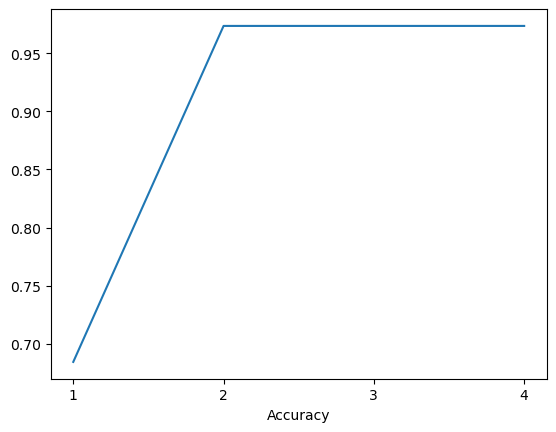

In [91]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [92]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 2


DecisionTreeClassifier(max_depth=2)

## Visualisation





### Visualise tree
We can visualise our tree using either Sklearn or Graphviz. The Sklearn tree is very simple in appearance while the Graphviz tree has better aesthetics. However, Graphviz is a little tricky to install, so using it is completely optional. 

If you wish to use Graphviz, follow the install instructions here: https://graphviz.readthedocs.io/en/stable/manual.html and set graphviz_installed = True in the code below.

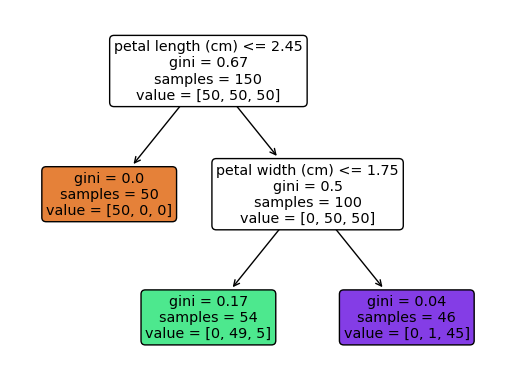

In [93]:
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(pruned, out_file='pruned_tree.dot', feature_names = iris.feature_names,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(pruned,feature_names = iris.feature_names, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz



### How to visualise the decison tree on a scatter plot.

By visualising our decision tree's prediction on a scatter plot we can see how the model gets more and more specific as the depth of the tree increases.

In [94]:
# isolate only 2 features (sepal width and length) to allow visualisation on a 2d scale
X_sep = iris.data[:,[0,1]]

/var/folders/3x/wp66yfsd3gzg96wsr396g_j00000gn/T/ipykernel_62426/2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
/var/folders/3x/wp66yfsd3gzg96wsr396g_j00000gn/T/ipykernel_62426/2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
/var/folders/3x/wp66yfsd3gzg96wsr396g_j00000gn/T/ipykernel_62426/2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
/var/folders/3x/wp66yfsd3gzg96wsr396g_j00000gn/T/ipykernel_62426/2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.t

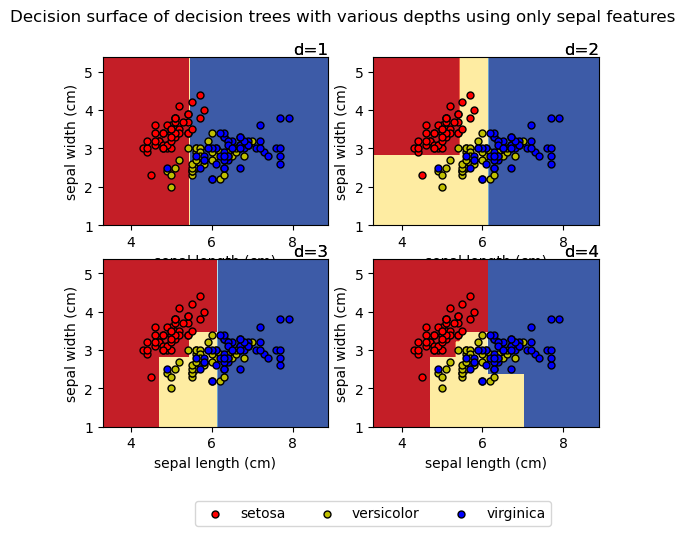

In [95]:
plt.suptitle("Decision surface of decision trees with various depths using only sepal features")

# make subplots for each depth
for idx, d in enumerate(pruned_depths):
  ax = plt.subplot(2, 2, idx+1)

  x_min, x_max = X_sep[:, 0].min() - 1, X_sep[:, 0].max() + 1
  y_min, y_max = X_sep[:, 1].min() - 1, X_sep[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  clf = DecisionTreeClassifier(max_depth=d).fit(X_sep, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])

  ax.title = plt.title('d={}'.format(d), loc='right', pad=-15)

  # Plot the training points
  for i, color in zip(range(3), "ryb"):
      idx = np.where(y == i)
      plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
  
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0, -0.40))
plt.show()


Load the data set

In [96]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')

# Select relevant variables
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic_data = titanic_data[selected_features]


Encode categorical variables

In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'].astype(str))


Split the data into training, development, and test sets:

In [98]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% training, 20% development, 20% test


Train a decision tree model without imposing restrictions on the depth:

In [99]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Train the decision tree model with imputed data
clf = DecisionTreeClassifier()
clf.fit(X_train_imputed, y_train)


DecisionTreeClassifier()

Handle data and missing vlaues and compute accuracy

In [100]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
X_dev_imputed = imputer.transform(X_dev)

# Train the classifier on the imputed training data
clf.fit(X_train_imputed, y_train)

# Make predictions on the imputed development data
y_dev_pred = clf.predict(X_dev_imputed)

# Calculate accuracy on the development set
accuracy_dev = accuracy_score(y_dev, y_dev_pred)
print("Accuracy on the development set:", accuracy_dev)

Accuracy on the development set: 0.797752808988764


Build models with different values of max_depth (2-10) and plot training and development accuracies:

In [101]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the imputer with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Define the max_depths for the DecisionTreeClassifier
max_depths = [3, 5, 7]

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train_imputed, y_train)  # Use the imputed data for training
    y_train_pred = clf.predict(X_train_imputed)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Training accuracy for max_depth =", max_depth, ":", train_accuracy)



Training accuracy for max_depth = 3 : 0.8277153558052435
Training accuracy for max_depth = 5 : 0.848314606741573
Training accuracy for max_depth = 7 : 0.8782771535580525


Most important contributing feature to surviving:

In [105]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define the parameters for the Random Forest model
st_params = {
    'n_estimators': 100,  
    'max_depth': None    
}

# Fit Random Forest model
rf_best = RandomForestClassifier(n_estimators=st_params['n_estimators'], max_depth=st_params['max_depth'], random_state=42)
rf_best.fit(X_train_imputed, y_train)

# Get feature importances
feature_importances = rf_best.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the most important feature
most_important_feature = importance_df.iloc[0]['Feature']
most_important_importance = importance_df.iloc[0]['Importance']

print("The most important feature is '{}', with an importance of {:.4f}".format(most_important_feature, most_important_importance))


The most important feature is 'Fare', with an importance of 0.2725


Final model accuracy

In [106]:
# Impute the missing values in the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test data
y_test_pred = clf.predict(X_test_imputed)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Final model accuracy on the test set:", accuracy_test)


Final model accuracy on the test set: 0.7597765363128491


Parameter tuning and accuracy report

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best accuracy: 0.8166108270146358
